# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


In [3]:
cities

['rikitea',
 'werda',
 'mandalgovi',
 'nuuk',
 'souillac',
 'atuona',
 'kudahuvadhoo',
 'dikson',
 'san patricio',
 'morondava',
 'bossangoa',
 'husavik',
 'bilma',
 'ushuaia',
 'port alfred',
 'castro',
 'olafsvik',
 'amderma',
 'vicente guerrero',
 'busselton',
 'punta arenas',
 'hobart',
 'taolanaro',
 'ambilobe',
 'qaanaaq',
 'kayerkan',
 'paamiut',
 'hithadhoo',
 'nome',
 'chenzhou',
 'iqaluit',
 'vaini',
 'teguldet',
 'bluff',
 'lipari',
 'hermanus',
 'albany',
 'weligama',
 'khonuu',
 'honningsvag',
 'arraial do cabo',
 'mataura',
 'barrow',
 'mabaruma',
 'riyadh',
 'provideniya',
 'cap malheureux',
 'east london',
 'yellowknife',
 'belmonte',
 'kapaa',
 'bandarbeyla',
 'yerofey pavlovich',
 'cabo san lucas',
 'constitucion',
 'mahon',
 'alofi',
 'orda',
 'bengkulu',
 'tuktoyaktuk',
 'cape town',
 'lazaro cardenas',
 'attawapiskat',
 'riverton',
 'san quintin',
 'bethel',
 'birpur',
 'quilmana',
 'puerto ayora',
 'avarua',
 'shimoda',
 'kibala',
 'tokmak',
 'port elizabeth',
 's

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = 'https://api.openweathermap.org/data/2.5/weather'
params = {'appid':weather_key,
         'q':cities[7],
         }
response = requests.get(url, params = params).json()
print(json.dumps(response, indent=3))

{
   "coord": {
      "lon": 80.5464,
      "lat": 73.5069
   },
   "weather": [
      {
         "id": 804,
         "main": "Clouds",
         "description": "overcast clouds",
         "icon": "04n"
      }
   ],
   "base": "stations",
   "main": {
      "temp": 268.89,
      "feels_like": 262.09,
      "temp_min": 268.89,
      "temp_max": 268.89,
      "pressure": 1012,
      "humidity": 96,
      "sea_level": 1012,
      "grnd_level": 1006
   },
   "visibility": 503,
   "wind": {
      "speed": 6.37,
      "deg": 290,
      "gust": 11.54
   },
   "clouds": {
      "all": 100
   },
   "dt": 1670270813,
   "sys": {
      "country": "RU",
      "sunrise": 0,
      "sunset": 0
   },
   "timezone": 25200,
   "id": 1507390,
   "name": "Dikson",
   "cod": 200
}


In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    params = {'appid':weather_key,
             'units':'imperial',
             'q':city,
         }
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params = params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.fromtimestamp(city_weather['dt']).strftime('%x')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | werda
Processing Record 3 of Set 1 | mandalgovi
Processing Record 4 of Set 1 | nuuk
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | kudahuvadhoo
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | san patricio
Processing Record 10 of Set 1 | morondava
Processing Record 11 of Set 1 | bossangoa
Processing Record 12 of Set 1 | husavik
Processing Record 13 of Set 1 | bilma
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | olafsvik
Processing Record 18 of Set 1 | amderma
City not found. Skipping...
Processing Record 19 of Set 1 | vicente guerrero
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | hobart
Processing Re

Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | cordoba
Processing Record 39 of Set 4 | talnakh
Processing Record 40 of Set 4 | narsaq
Processing Record 41 of Set 4 | linares
Processing Record 42 of Set 4 | meulaboh
Processing Record 43 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 4 | minot
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | salinas
Processing Record 47 of Set 4 | north bend
Processing Record 48 of Set 4 | gat
Processing Record 49 of Set 4 | airai
Processing Record 0 of Set 5 | bani
Processing Record 1 of Set 5 | trelew
Processing Record 2 of Set 5 | cochrane
Processing Record 3 of Set 5 | sambava
Processing Record 4 of Set 5 | khatanga
Processing Record 5 of Set 5 | qabis
City not found. Skipping...
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | dillon
Processing Record 8 of Set 5 | riohacha
Processing Record 9 of Set 5 | esna
Processing Record 10 of Set 5 | pochutla
Pr

Processing Record 27 of Set 8 | itoman
Processing Record 28 of Set 8 | wodonga
Processing Record 29 of Set 8 | gornopravdinsk
Processing Record 30 of Set 8 | northam
Processing Record 31 of Set 8 | tabou
Processing Record 32 of Set 8 | sfantu gheorghe
Processing Record 33 of Set 8 | tacoronte
Processing Record 34 of Set 8 | ayan
Processing Record 35 of Set 8 | green river
Processing Record 36 of Set 8 | buckeye
Processing Record 37 of Set 8 | pula
Processing Record 38 of Set 8 | ahipara
Processing Record 39 of Set 8 | mayskiy
Processing Record 40 of Set 8 | sur
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | slave lake
Processing Record 43 of Set 8 | jardim
Processing Record 44 of Set 8 | lyubar
Processing Record 45 of Set 8 | alotau
City not found. Skipping...
Processing Record 46 of Set 8 | luganville
Processing Record 47 of Set 8 | mariakani
Processing Record 48 of Set 8 | kungurtug
Processing Record 49 of Set 8 | guaranesia
Processing Record 0 o

Processing Record 14 of Set 12 | hauterive
Processing Record 15 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 16 of Set 12 | cidreira
Processing Record 17 of Set 12 | nagua
Processing Record 18 of Set 12 | neiafu
Processing Record 19 of Set 12 | takoradi
Processing Record 20 of Set 12 | monrovia
Processing Record 21 of Set 12 | singarayakonda
Processing Record 22 of Set 12 | rock sound
Processing Record 23 of Set 12 | abonnema
Processing Record 24 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 25 of Set 12 | cuenca
Processing Record 26 of Set 12 | palu
Processing Record 27 of Set 12 | karasjok
Processing Record 28 of Set 12 | pervomayskiy
Processing Record 29 of Set 12 | rocha
Processing Record 30 of Set 12 | crotone
Processing Record 31 of Set 12 | klyuchevsk
Processing Record 32 of Set 12 | illapel
Processing Record 33 of Set 12 | kavaratti
Processing Record 34 of Set 12 | tashtagol
Processing Record 35 of Set 12 | meyungs
City not found. 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,75.47,81,99,14.25,PF,12/05/22
1,werda,-25.2667,23.2833,73.74,10,0,11.41,BW,12/05/22
2,mandalgovi,45.7625,106.2708,4.35,42,0,8.03,MN,12/05/22
3,nuuk,64.1835,-51.7216,41.61,65,75,24.16,GL,12/05/22
4,souillac,-20.5167,57.5167,77.38,78,40,10.36,MU,12/05/22


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,75.47,81,99,14.25,PF,12/05/22
1,werda,-25.2667,23.2833,73.74,10,0,11.41,BW,12/05/22
2,mandalgovi,45.7625,106.2708,4.35,42,0,8.03,MN,12/05/22
3,nuuk,64.1835,-51.7216,41.61,65,75,24.16,GL,12/05/22
4,souillac,-20.5167,57.5167,77.38,78,40,10.36,MU,12/05/22


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

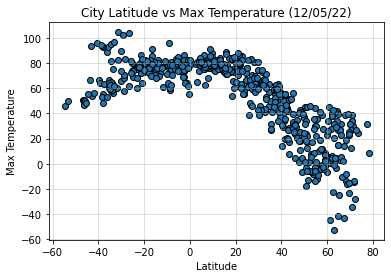

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature ({})'.format(city_data_df['Date'][0]))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(alpha=.5)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

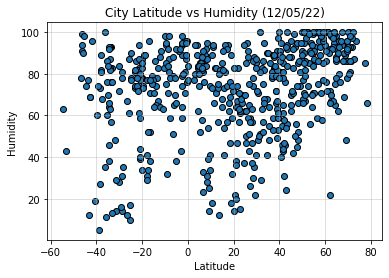

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity ({})'.format(city_data_df['Date'][0]))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

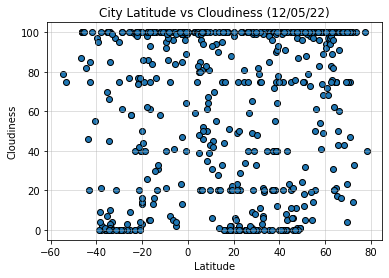

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness ({})'.format(city_data_df['Date'][0]))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

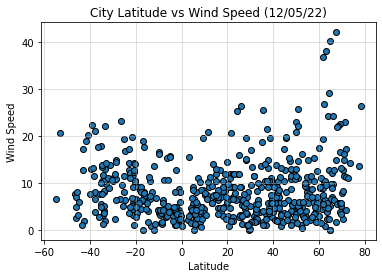

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed ({})'.format(city_data_df['Date'][0]))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(alpha=.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    result = linregress(x, y)
    print(f'The Coefficient of Determination (R) is {result.rvalue ** 2}')
    return plt.plot(x, result.intercept + result.slope*x, 'r', label='Linear Regression')
def linreg_annotation(x,y):
    result = linregress(x, y)
    return f'y = {round(result.slope, 2)}x + {round(result.intercept, 2)}'

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mandalgovi,45.7625,106.2708,4.35,42,0,8.03,MN,12/05/22
3,nuuk,64.1835,-51.7216,41.61,65,75,24.16,GL,12/05/22
6,kudahuvadhoo,2.6708,72.8944,79.48,77,100,2.15,MV,12/05/22
7,dikson,73.5069,80.5464,24.33,96,100,14.25,RU,12/05/22
8,san patricio,28.0170,-97.5169,81.07,57,65,14.92,US,12/05/22


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,75.47,81,99,14.25,PF,12/05/22
1,werda,-25.2667,23.2833,73.74,10,0,11.41,BW,12/05/22
4,souillac,-20.5167,57.5167,77.38,78,40,10.36,MU,12/05/22
5,atuona,-9.8000,-139.0333,77.45,75,92,16.49,PF,12/05/22
9,morondava,-20.2833,44.2833,73.15,87,13,10.02,MG,12/05/22


###  Temperature vs. Latitude Linear Regression Plot

The Coefficient of Determination (R) is 0.7118906672478454


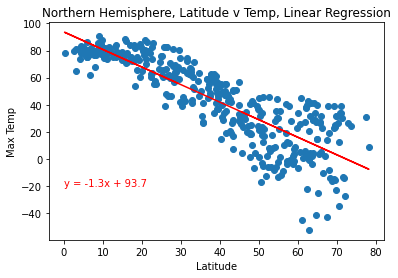

In [25]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

plt.title('Northern Hemisphere, Latitude v Temp, Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(linreg_annotation(northern_hemi_df['Lat'], northern_hemi_df['Max Temp']), (0,-20), color='red')
plt.show()

The Coefficient of Determination (R) is 0.12942751053552684


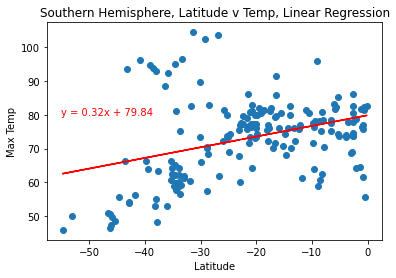

In [26]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

plt.title('Southern Hemisphere, Latitude v Temp, Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(linreg_annotation(southern_hemi_df['Lat'], southern_hemi_df['Max Temp']), (-55,80), color='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The Coefficient of Determination (R) is 0.1317885544576377


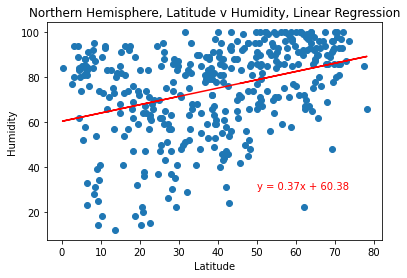

In [27]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

plt.title('Northern Hemisphere, Latitude v Humidity, Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(linreg_annotation(northern_hemi_df['Lat'], northern_hemi_df['Humidity']), (50,30), color='red')
plt.show()

The Coefficient of Determination (R) is 0.053246606863252124


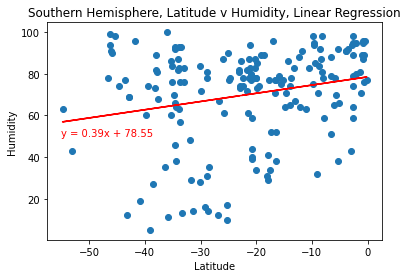

In [29]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

plt.title('Southern Hemisphere, Latitude v Humidity, Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(linreg_annotation(southern_hemi_df['Lat'], southern_hemi_df['Humidity']), (-55,50), color='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The Coefficient of Determination (R) is 0.04285051272814909


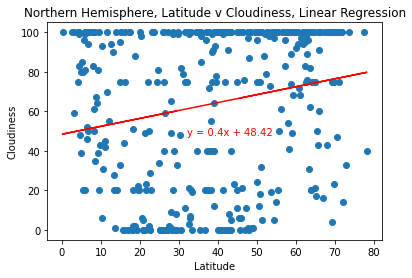

In [37]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

plt.title('Northern Hemisphere, Latitude v Cloudiness, Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(linreg_annotation(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness']), (32,48), color='red')
plt.show()

The Coefficient of Determination (R) is 0.04769494561054947


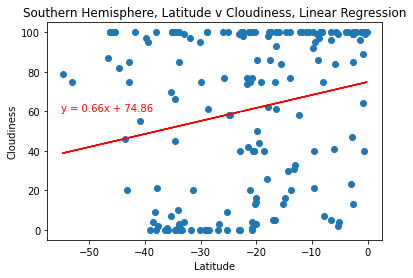

In [22]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

plt.title('Southern Hemisphere, Latitude v Cloudiness, Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(linreg_annotation(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness']), (-55,60), color='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The Coefficient of Determination (R) is 0.055585746126579884


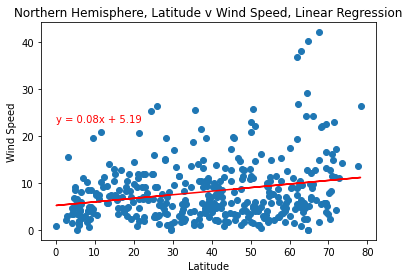

In [41]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

plt.title('Northern Hemisphere, Latitude v Wind Speed, Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(linreg_annotation(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed']), (0,23), color='red')
plt.show()

The Coefficient of Determination (R) is 0.10397352362197458


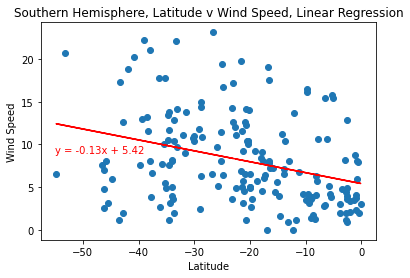

In [43]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

plt.title('Southern Hemisphere, Latitude v Wind Speed, Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(linreg_annotation(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed']), (-55,9), color='red')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE